## Step 1: Load and Prepare Data

In [1]:
import pandas as pd

# Load pre-COVID and post-COVID data
pre_covid_data = pd.read_csv('pre_covid_data(1).csv')
post_covid_data = pd.read_csv('covid_data(1).csv')

# Combine the data for a unified analysis
data = pd.concat([pre_covid_data, post_covid_data])

# Display the first few rows of the combined data
print(data.head())

                        App Name        Category  Rating  Reviews        Size  \
0  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
1  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
2  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
3  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
4  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   

   Installs  Type  Price Content Rating                   Genres  ...  \
0    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
1    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
2    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
3    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
4    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   

    Android Ver                                  Translated_Review Sentime

## Step 2: Preprocess Data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select relevant columns (excluding Price because it's 0)
columns = ['Reviews', 'Genres', 'Rating']
data = data[columns]

# Handle missing values
data.dropna(inplace=True)

# Convert categorical data to numeric using Label Encoding
label_encoder = LabelEncoder()
data['Genres'] = label_encoder.fit_transform(data['Genres'])

# Display the preprocessed data
print(data.head())

# Split the data into features (X) and target (y)
X = data.drop('Rating', axis=1)
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


   Reviews  Genres  Rating
0    20260       3     4.7
1    20260       3     4.7
2    20260       3     4.7
3    20260       3     4.7
4    20260       3     4.7
Training set size: (95013, 2)
Testing set size: (23754, 2)


## Step 3: Train a Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training score:", train_score)
print("Testing score:", test_score)

Training score: 1.0
Testing score: 1.0


## Step 4: Evaluate Feature Importance

In [13]:
# Extract feature importances
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


   Feature  Importance
0  Reviews     0.75654
1   Genres     0.24346


## Step 5: Visualize Feature Importance

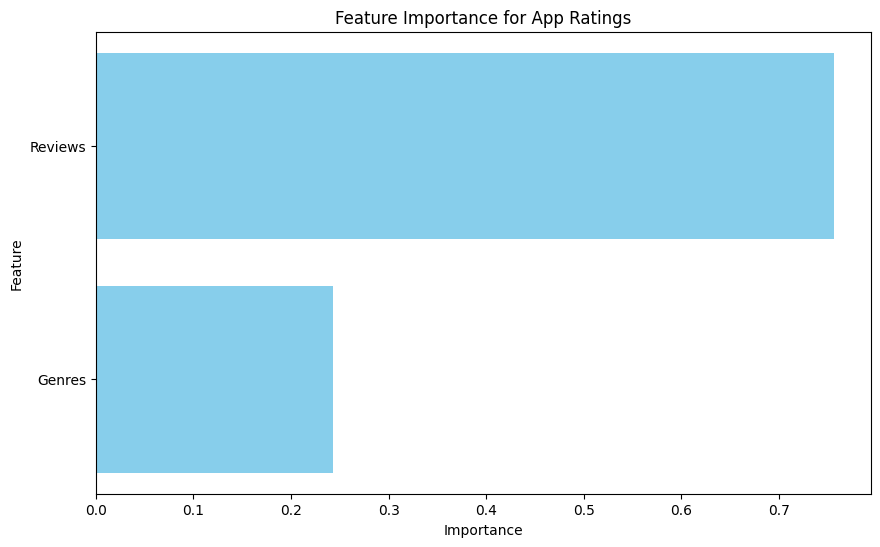

In [14]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for App Ratings')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## Step 6: Train a Linear Regression Model

Model Performance Metrics:
Mean Squared Error: 0.022606595993784603
R-squared: 0.502320363462565


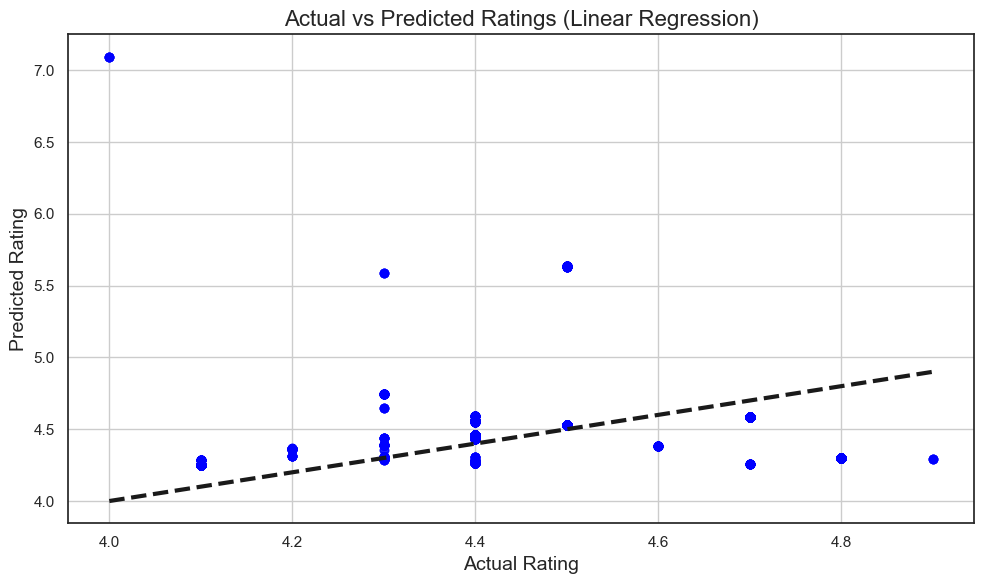

In [54]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model performance
print("Model Performance Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Rating', fontsize=14)
plt.ylabel('Predicted Rating', fontsize=14)
plt.title('Actual vs Predicted Ratings (Linear Regression)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


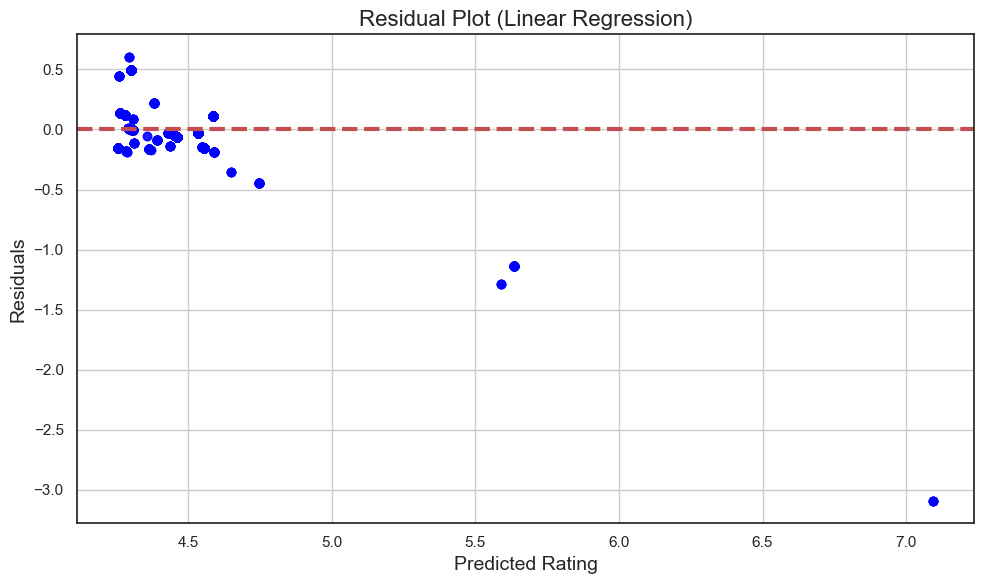

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (prediction errors)
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))

plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=3)
plt.xlabel('Predicted Rating', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot (Linear Regression)', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.show()


## Step 7: Train a Gradient Boosting Regressor Model

Model Performance Metrics:
Mean Squared Error: 3.94085806545958e-05
R-squared: 0.9991324280709034


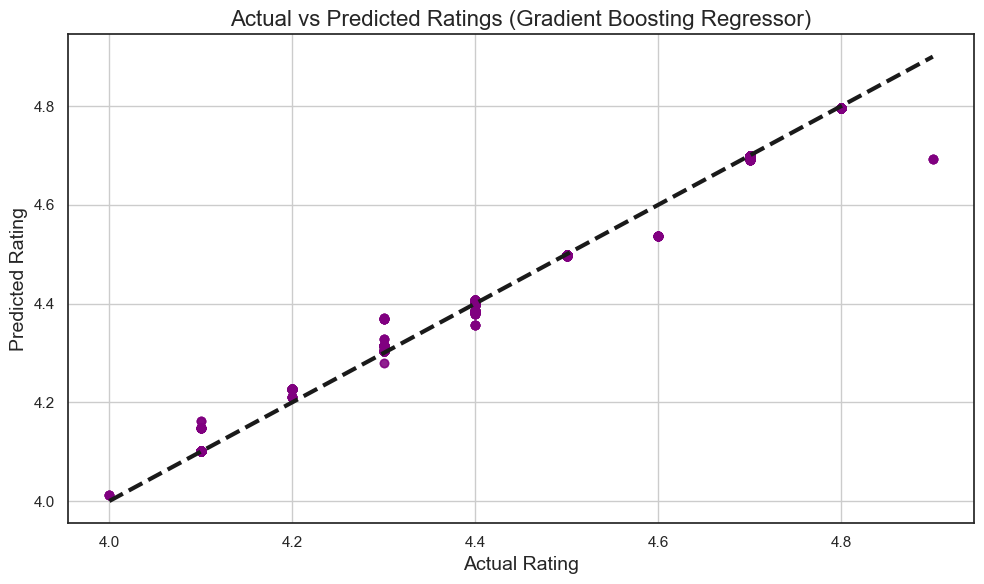

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance metrics
print("Model Performance Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Rating', fontsize=14)
plt.ylabel('Predicted Rating', fontsize=14)
plt.title('Actual vs Predicted Ratings (Gradient Boosting Regressor)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
